Questions to explore

- Are bigger budget movies more highly rated?
- How has movie budgets changed over time? (adjusted for inflation - inflation not in the data) [Maybe 60s-present]

### Import libraries and examine data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
movies = pd.read_csv('data/tmdb_5000_movies.csv')

movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [3]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


In [4]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

### Question 1: Are bigger budget movies more highly rated?

In [5]:
budget_df = movies[['budget','vote_average','vote_count']].copy()
df = budget_df

df.head(2)

,budget,vote_average,vote_count
0,237000000,7.2,11800
1,300000000,6.9,4500


#### Remove movies with less than 10 votes

There appear to be 411 movies with fewer than 10 votes. 

In [6]:
sum(df['vote_count']<10)

411

In [7]:
df = df[df['vote_count']>10]

In [8]:
len(df)

4358

#### Plot budget vs. vote average

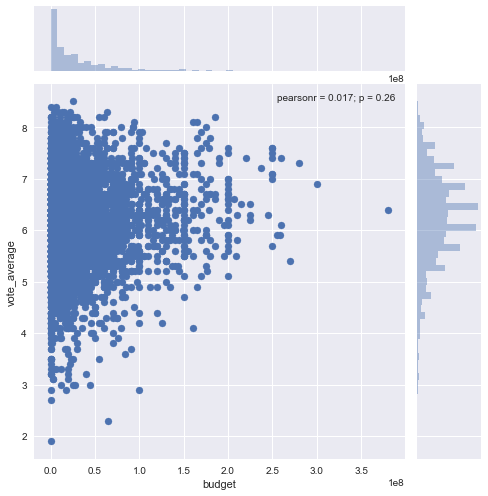

In [9]:
sns.jointplot('budget','vote_average',data=df,size=7);

To the naked eye, there definitely appears to be a a fairly linear trend (with a great number of outliers). But the correlation coefficient is fairly low. It appears that the higher budget movies may be make the trend more difficult to see.

#### Examine distribution of budgets

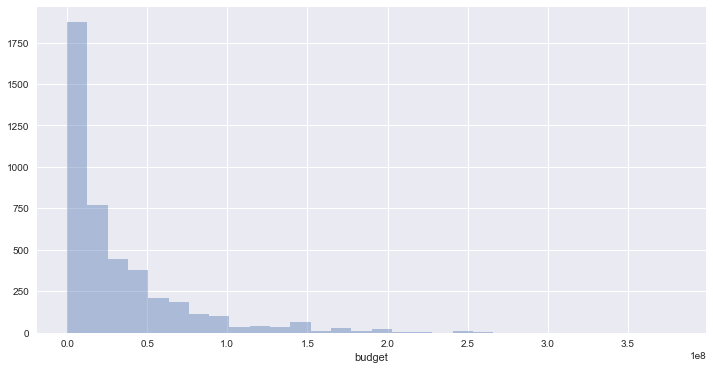

In [10]:
plt.figure(figsize=(12,6))
sns.distplot(df['budget'],bins=30,kde=False);

Indeed, it appears that are movies mostly have a budget of less than 100 million, but are being obscured by a few movies with a very large budget.

#### Remove movies with budget greater than $100,000,000.

In [11]:
#We'll remove these 320 movies with a budget of above a 100 million dollars.
len(df[df['budget']>=100000000]) 

320

In [12]:
df=df[df['budget']<100000000]

len(df) #Note - We are now dealing with 80% of our original data

4038

#### Plot of budget vs. vote average with trimmed data

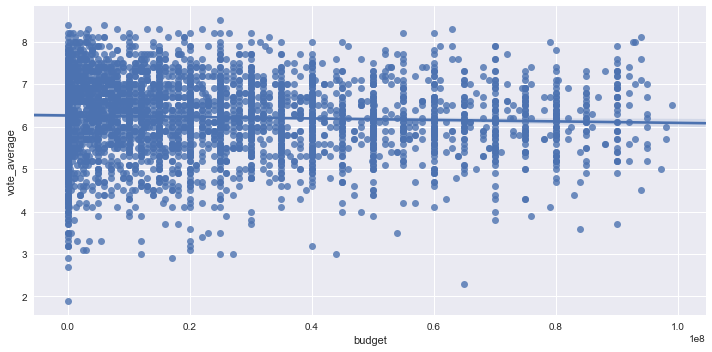

In [13]:
sns.lmplot('budget','vote_average',data=df,aspect=2);

In [14]:
corr, p_value = stats.pearsonr(df['budget'], df['vote_average'])

print("Correlation: {}".format(corr))
print("With p-value: {}".format(p_value))

Correlation: -0.04669469346213662
With p-value: 0.002998158926134231


The pearson correlatation coefficient is negative which indicates a negative relationship (i.e. increase budget leads to decrease in average rating). Additionally the p-value is < .05 which implies. that the trend is statistically significant. However, the correlation coefficent is so small that most of the points are not accounted for by this trend.

### Question 2: How have movie budgets changed over time?

In [15]:
budget_time_df = movies[['budget','revenue','release_date']].copy()

df = budget_time_df

df.head(2)

,budget,revenue,release_date
0,237000000,2787965087,2009-12-10
1,300000000,961000000,2007-05-19


#### Create year column

In [16]:
#Dates are currently strings, with first 4 characters representing the year
df.iloc[0]['release_date'][:4]

'2009'

#### Deal with missing information

In [17]:
#1 Null value in the data
sum(df['release_date'].isnull())

1

In [18]:
df[df['release_date'].isnull()]

,budget,revenue,release_date
4553,0,0,NaN


In [19]:
#We will drop this row since it contains no information.
df.dropna(axis=0,inplace=True)

In [20]:
#Slice the first four characters from each date and convert to integer
df['year']=df['release_date'].apply(lambda x: int(x[:4]))

#df['year'][:2]
df.head(2)

,budget,revenue,release_date,year
0,237000000,2787965087,2009-12-10,2009
1,300000000,961000000,2007-05-19,2007


#### Adjust for inflation

Later on, code to adjust for inflation should be added here.

#### Plot year vs. budget

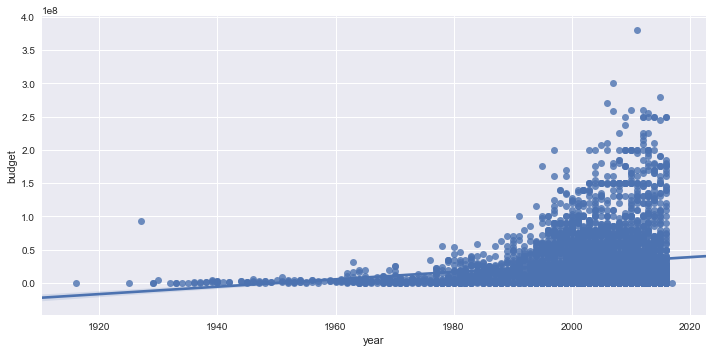

In [21]:
sns.lmplot('year','budget',data=df,aspect=2);

In [22]:
corr, p_value = stats.pearsonr(df['year'], df['budget'])

print("Correlation: {}".format(corr))
print("With p-value: {}".format(p_value))

Correlation: 0.1689904886028579
With p-value: 4.277045504602806e-32


This correlation is significantly higher than our first question, but is still quite small. From the data, it appears that a higher degree relationship may be more natural.

#### Fit higher degree polynomials to look for relationship

In [23]:
"""
#Later I'll fit a quadratic equation and examine it.
import numpy as np

quad_fit = np.polyfit(df['year'], df['budget'], 2)
"""

"\n#Later I'll fit a quadratic equation and examine it.\nimport numpy as np\n\nquad_fit = np.polyfit(df['year'], df['budget'], 2)\n"

#### Consider modern movies subset

It appears that most of our database contains movies from the year 1960 on. We'll relook at the data without those earlier movies.

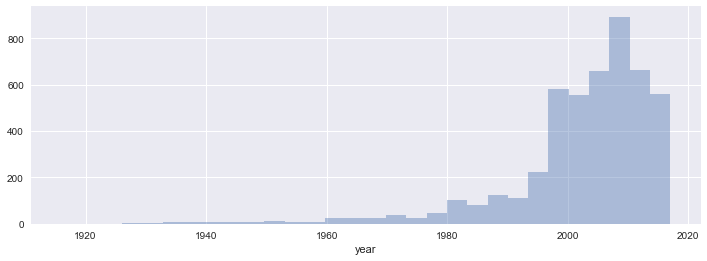

In [24]:
plt.figure(figsize=(12,4))
sns.distplot(df['year'],bins=30,kde=False);

In [25]:
#Only 72 movies in our remaining dataset were made before 1960
sum(df['year']<1960)

72

In [26]:
df = df[df['year']>=1960]

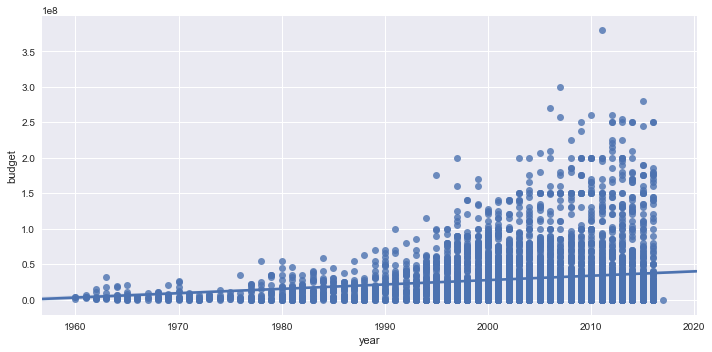

In [27]:
sns.lmplot('year','budget',data=df,aspect=2);

In [28]:
corr, p_value = stats.pearsonr(df['year'], df['budget'])

print("Correlation: {}".format(corr))
print("With p-value: {}".format(p_value))

Correlation: 0.15351606119283057
With p-value: 2.450521087598367e-26


It appears that we are spending more and more as as the years go by. However, these results are still not adjusted for inflation. 

Additionally, to understand the data, a quadratic relationship is appearing more and more necessary.